In [10]:
from dependencies import *
from background import *
from model import *
from defaults import *

### Choose parameters to make key features visually apparent

In [11]:
t_Earth = 719.
A0 = 10e12

## LIP emplacement characteristics
B0 = 0.5e2 # LIP height [m]
erup_freq = 3e5/1e6 # eruption frequency [Myr]
emp_dur = 1
degass = 0.5 # [examol C]

## Rock weathering characteristics
P0 = 400 # optimal saprolite production [m/Myr]
E_P = 0.01 # E/P ratio
c = 1 # E relief feedback sensitivity

## Background climate 
V = 6
N0 = N_t(t_Earth)

## Climate sensitivities
n = 0.5 # global weathering feedback strength []
n_p = 0.5 # LIP weathering feedback strength []
n_e = 0.5 # LIP erosion feedback strength []

## Temperature response
T0 = 288 # surface temp [K]
b = 5.35

### Run the model

In [12]:
t_max = 2.
t,N,B,H,P,E,degass_arr = run_model(dt=dt,t_max=t_max, # Model setup
                           emp_dur=emp_dur,A0=A0, # LIP emplacement characteristics
                           B0=B0,erup_freq=erup_freq, # LIP emplacement characteristics
                           degass=degass, # LIP degassing characteristics
                           P0=P0,E_P=E_P,d=d,c=c,Xm=Xm, # Rock weathering characteristics
                           N0=N0,V=V, # Background climate
                           n=n,n_p=n_p,n_e=n_e, # Feedback sensitivities
                           prognostics=True
                          )

T = T0+x(N,N0,b,a)

### Plot

In [13]:
plt.rcParams.update({'legend.fontsize':12,
                     'font.size':14,
                     'lines.linewidth':2})

In [14]:
import matplotlib.gridspec as gridspec

plt.rcParams.update({'legend.fontsize':9,
                     'font.size':9,
                     'lines.linewidth':1,
                     'axes.titlesize':9})

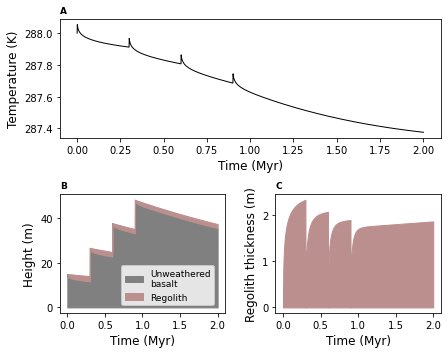

In [16]:
fig = plt.figure(figsize=(6.3,5)) 
gs = gridspec.GridSpec(2,2)

ax1 = fig.add_subplot(gs[0, :])  # Span all columns on the first row
ax2 = fig.add_subplot(gs[1, 0])  # Second row, first column
ax3 = fig.add_subplot(gs[1, 1])  # Second row, second column

ax1.set_title('A',loc='left',fontweight='bold')
ax1.plot(t,T,color='k')
ax1.set_ylabel('Temperature (K)')
ax1.set_xlabel('Time (Myr)')

ax2.set_title('B',loc='left',fontweight='bold')
ax2.fill_between(t,0,B,color='grey',label='Unweathered\nbasalt')
ax2.fill_between(t,B,B+H,color='rosybrown',label='Regolith')
ax2.set_ylabel('Height (m)')
ax2.set_xlabel('Time (Myr)')
ax2.legend(bbox_to_anchor=(0,0.44,0.96,0))

#ax2a = ax2.twinx()
#ax2a.plot(t,E,c='k',linestyle='--',alpha=0.5)
#ax2a.set_ylabel('E (m/Myr)')

ax3.set_title('C',loc='left',fontweight='bold')
ax3.fill_between(t,0,H,color='rosybrown',label='Regolith')
ax3.set_ylabel('Regolith thickness (m)')
ax3.set_xlabel('Time (Myr)')

#ax3a = ax3.twinx()
#ax3a.plot(t,P,c='k',linestyle='--',alpha=0.5)
#ax3a.set_ylabel('P (m/Myr)')

plt.tight_layout()
plt.savefig('figs/example_run'+'.jpg',format='jpg',bbox_inches='tight',dpi=600)
plt.show()